In [56]:
# Importing modules
import torch
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
data= datasets.load_breast_cancer()
x,y=data.data, data.target
n_samples,n_features=x.shape
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [28]:
x_train= torch.from_numpy(x_train.astype(np.float32))
y_train= torch.from_numpy(y_train.astype(np.float32))
x_test= torch.from_numpy(x_test.astype(np.float32))
y_test= torch.from_numpy(y_test.astype(np.float32))
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

In [47]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, inp_features):
        super(LogisticRegression,self).__init__()
        self.linear=torch.nn.Linear(inp_features,1)
        
    def forward(self,x):
        return torch.sigmoid(self.linear(x))
        

In [48]:
model=LogisticRegression(n_features)
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
loss=torch.nn.BCELoss()

In [66]:
num_itrs=100

for i in range(num_itrs):
    y_pred=model(x_train)
    l=loss(y_pred,y_train)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

In [67]:
Y=model(x_test)
with torch.no_grad():
    Y=Y.round()
    error=(Y-y_test)**2
    error=error.mean()


tensor(0.0351)

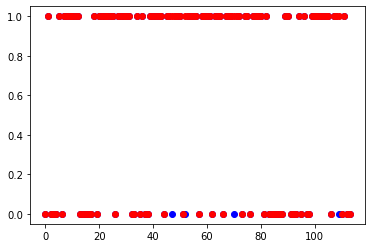

In [68]:
plt.plot(y_test,"bo")
plt.plot(Y,"ro")
error